In [1]:
import glob
list_files=glob.glob('./recordings+7.14+Luc/*.txt')
list_names=[s.strip('recordings+7.14+Luc/\\.txt').replace('-','_') for s in list_files]
list_names[0:10]

['(jab_)cross_shadowboxing_medium_20_T7R_15315512423',
 '(jab_)cross_shadowboxing_slow_20_T7R_1531551153638',
 '(jab_)cross_waterbag_hard_20_T7R_1531551996366',
 '(jab_)cross_waterbag_light_20_T7R_153155187793',
 '(jab_)cross_waterbag_mediumpower_20_T7R_1531551924743',
 'biceps_curls_10_T7L_1531913275450',
 'biceps_curls_10_T7L_1531913463782',
 'biceps_curls_10_T7L_153191370645',
 'biceps_curls_10_T7R_1531913275450',
 'biceps_curls_10_T7R_1531913463782']

In [ ]:
import pandas as pd
def tabulate_data2(file):
    list_sensors=['gyroX','gyroY','gyroZ','lowAccelX','lowAccelY','lowAccelZ', 'highAccelX','highAccelY','highAccelZ']
    f = open(file,'rt')
    remove_trackerName= [line.replace('T7L,', "").replace('T7R,',"") for line in f.readlines()]
    file_as_list= [[token.split(',') for token in line.split(';')] for line in remove_trackerName][0]
    file_as_list=sum([l for l in file_as_list], []) #flattens the nested list comprehension into one list
    chunks= [file_as_list[i:i+9] for i in range(0,len(file_as_list),9)]
    data=pd.DataFrame(chunks).apply(pd.to_numeric, errors='coerce')
    data.columns=list_sensors
    data['exercise']=list_names[list_files.index(file)]
    return data

In [14]:
data1=pd.concat([tabulate_data2(file) for file in list_files])
data1.tail()
data1.to_csv('data1.csv',index=False)

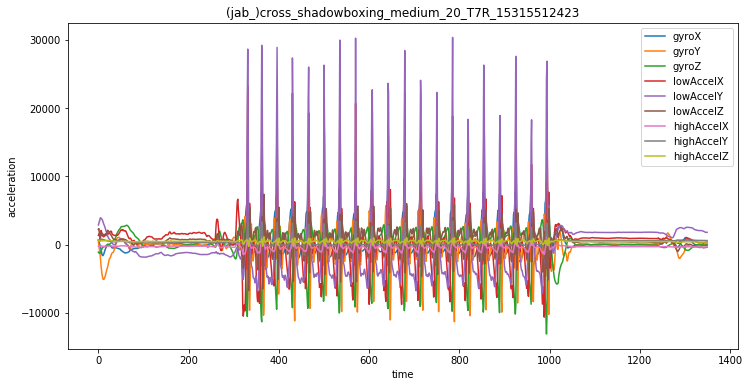

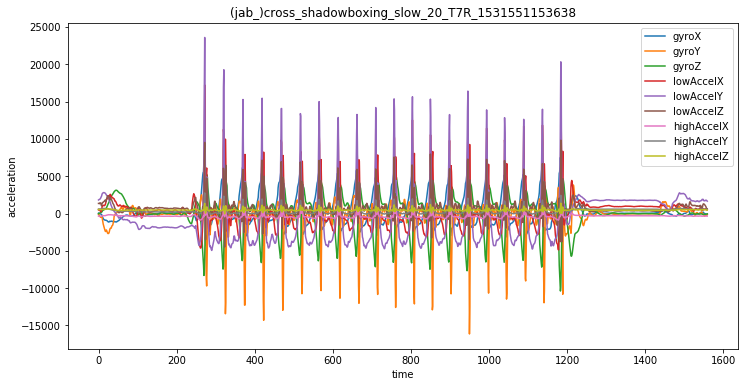

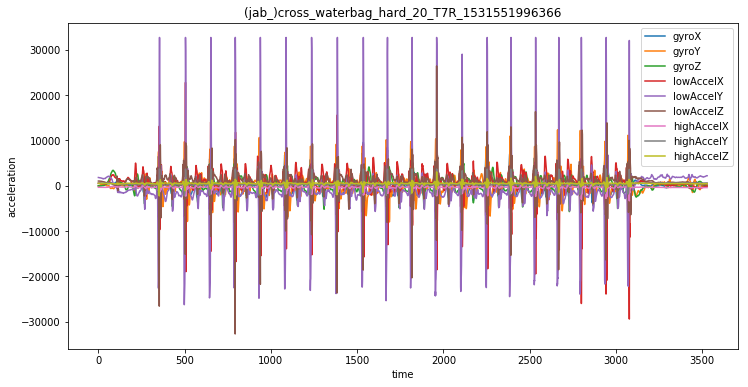

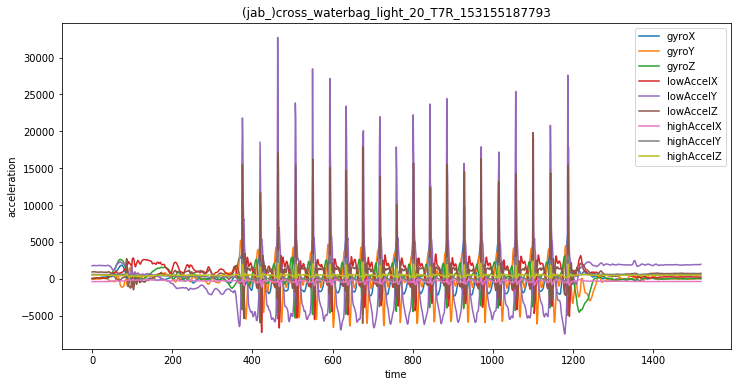

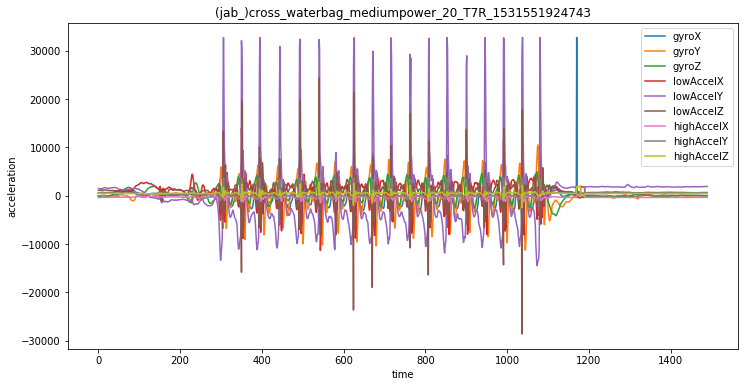

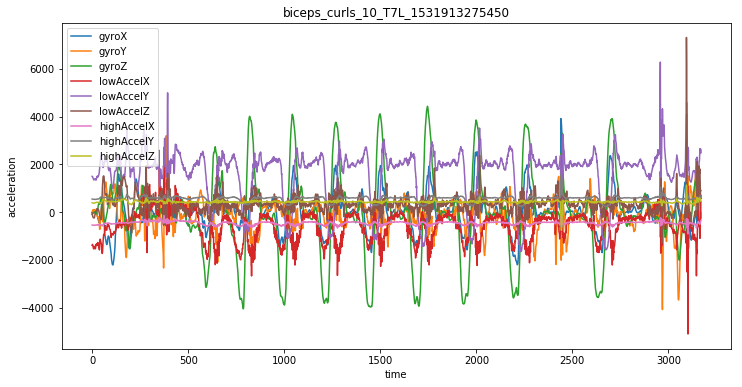

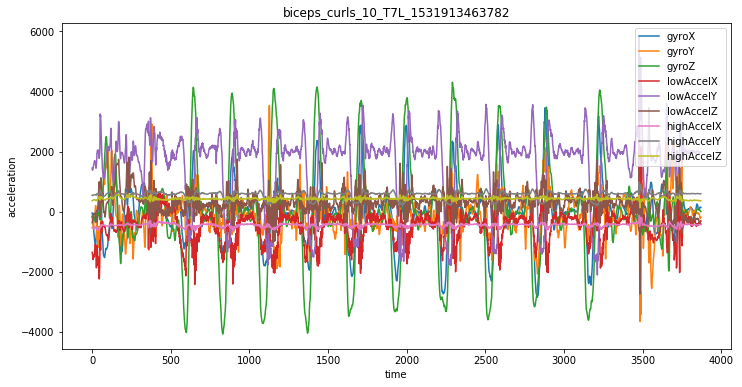

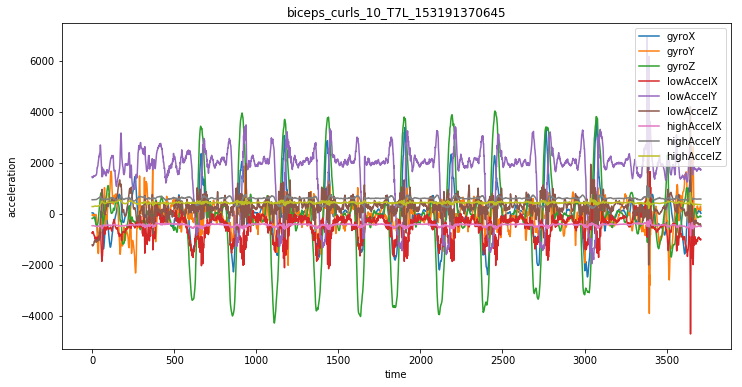

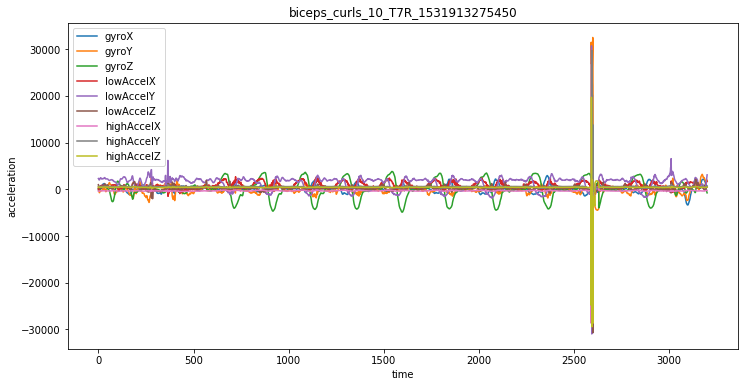

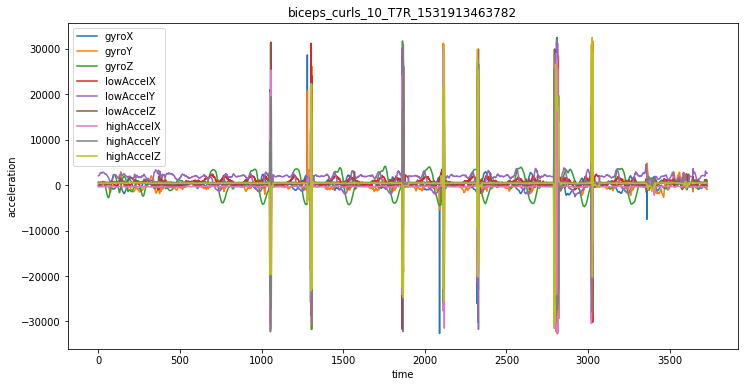

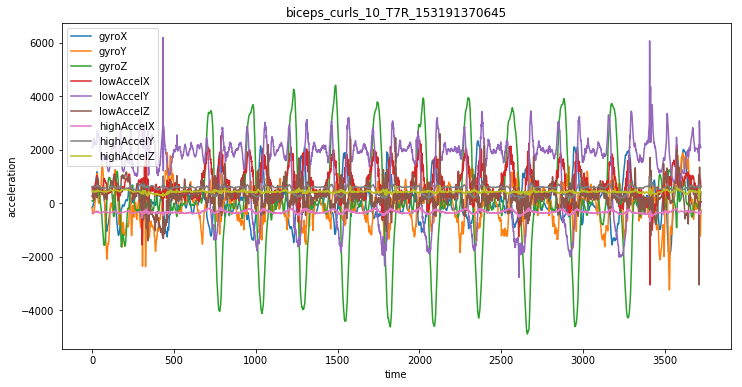

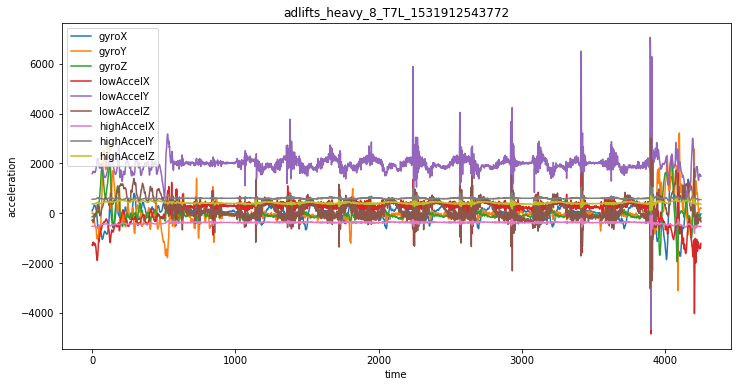

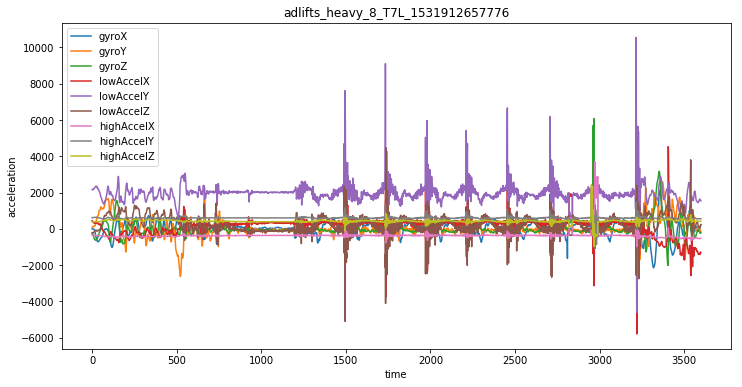

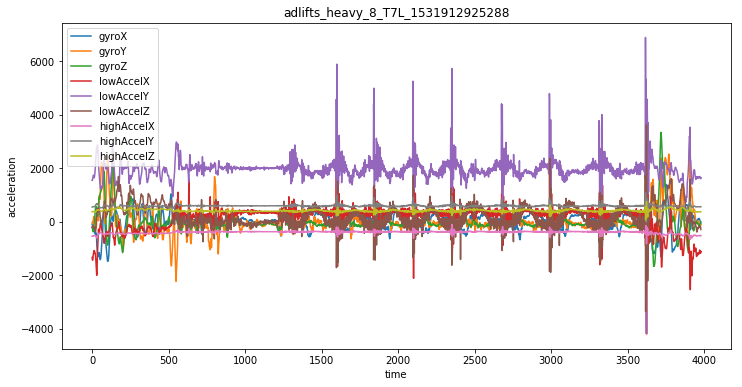

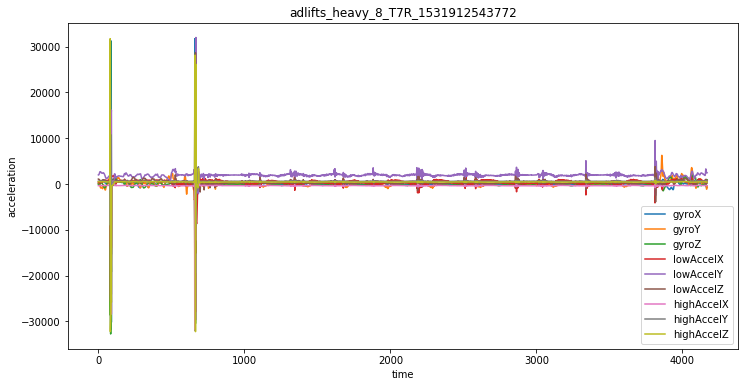

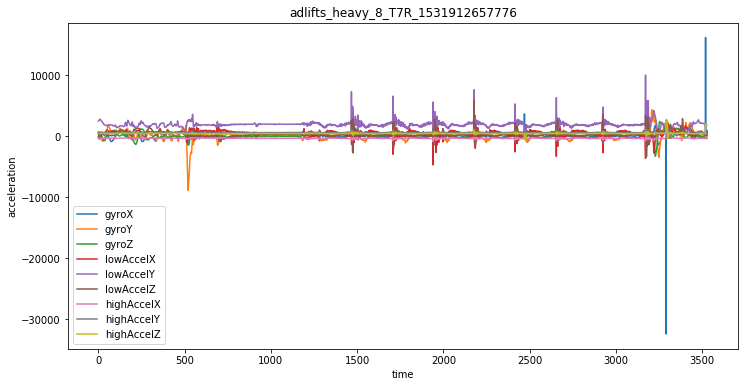

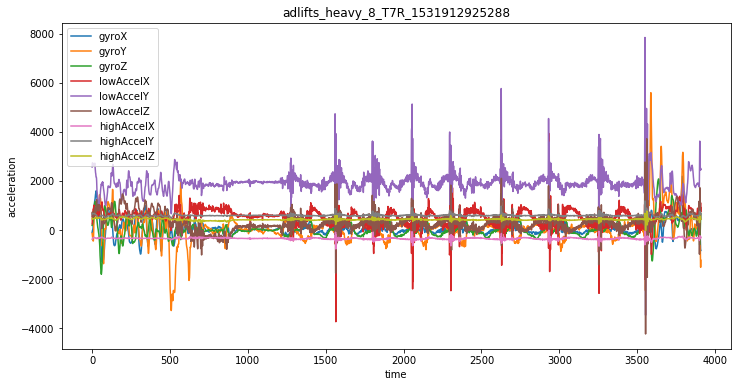

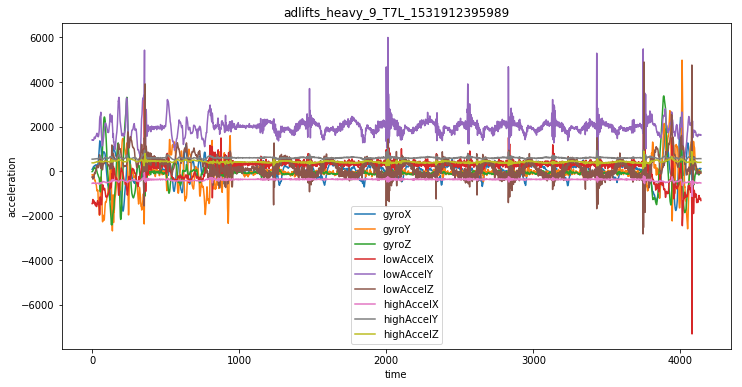

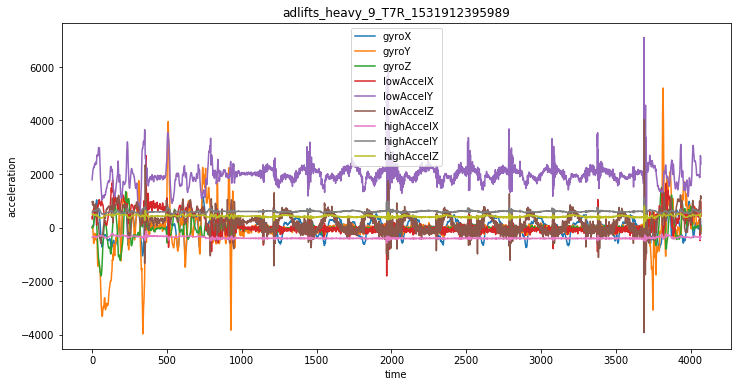

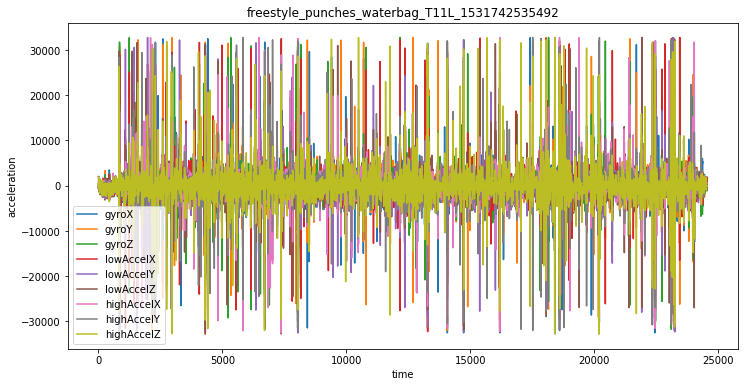

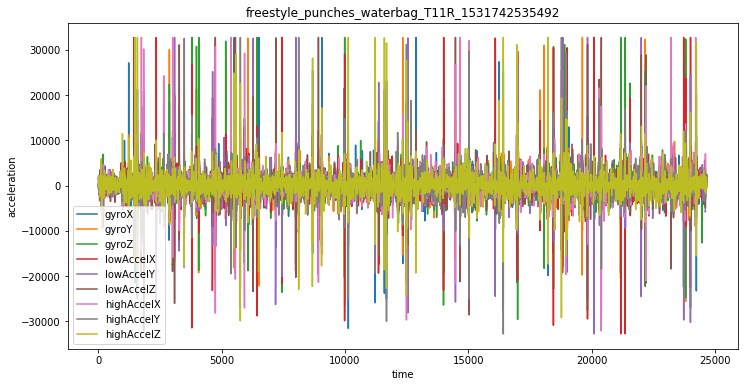

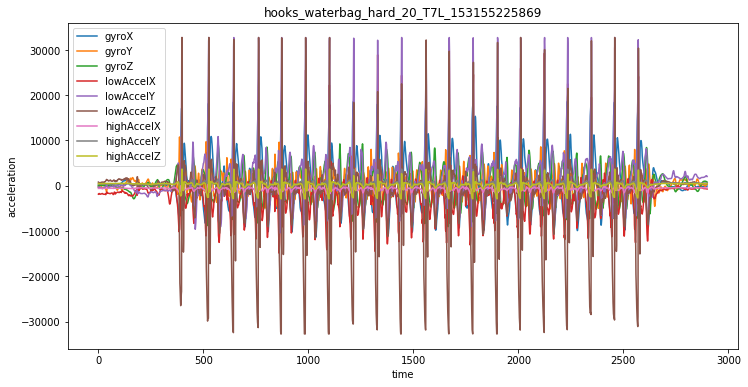

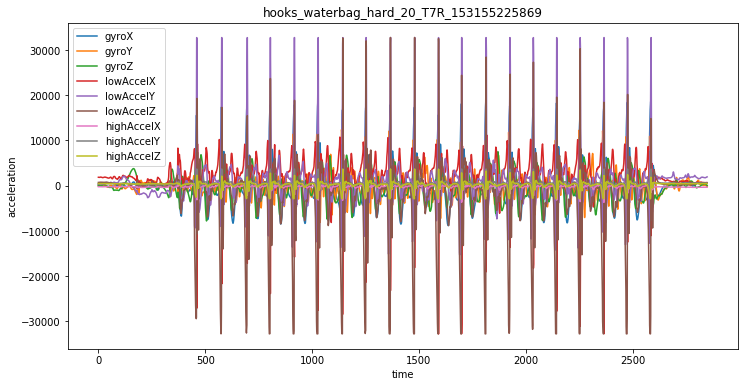

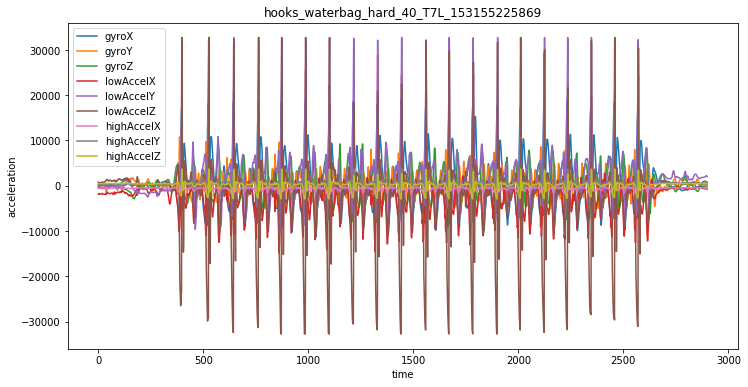

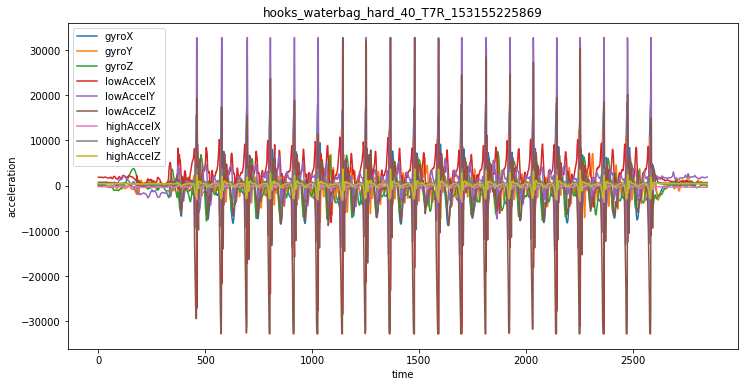

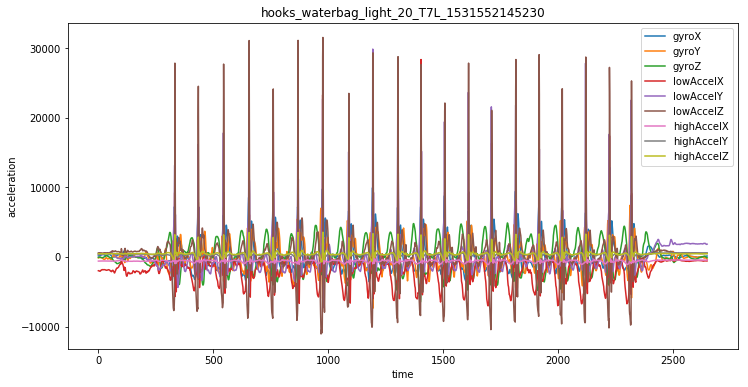

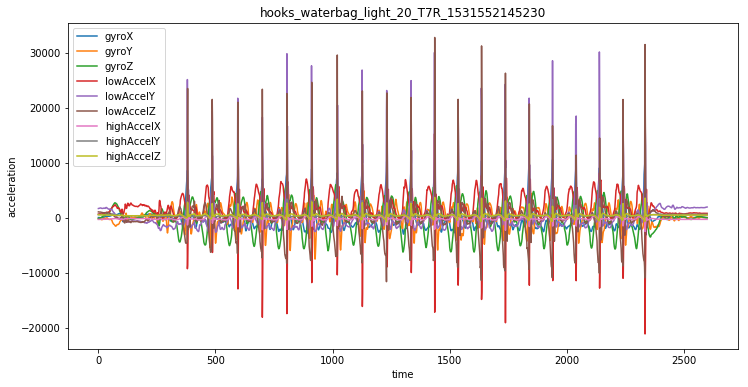

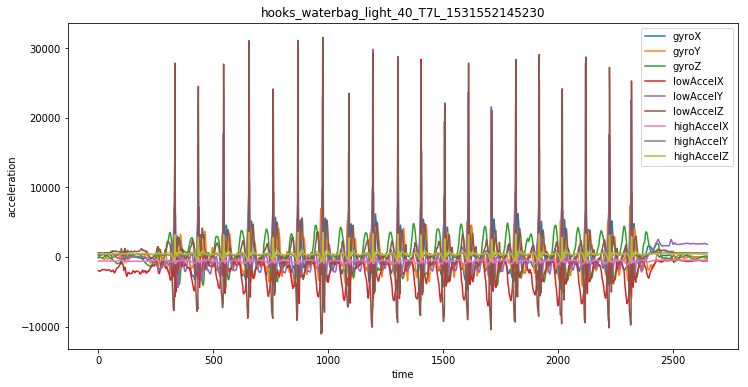

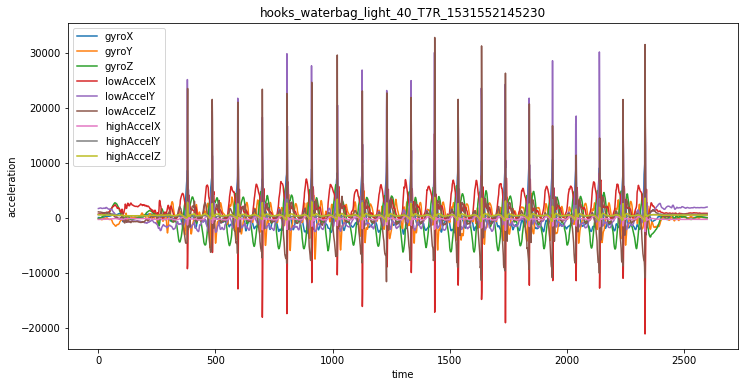

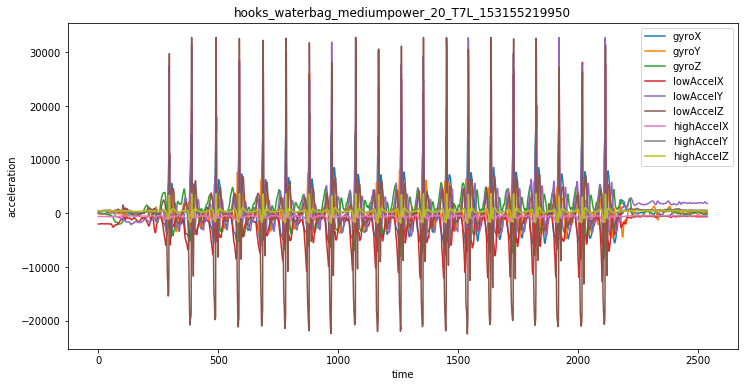

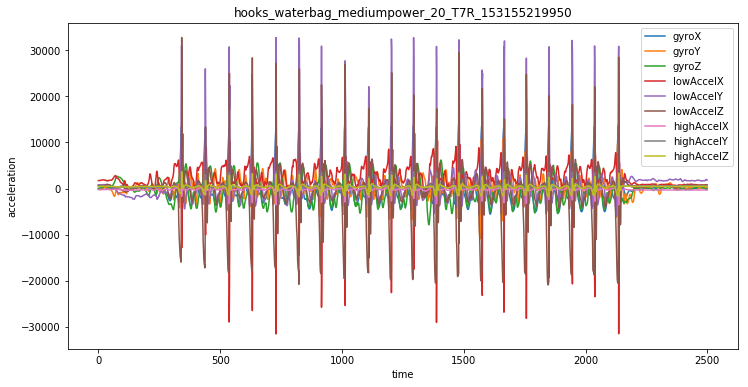

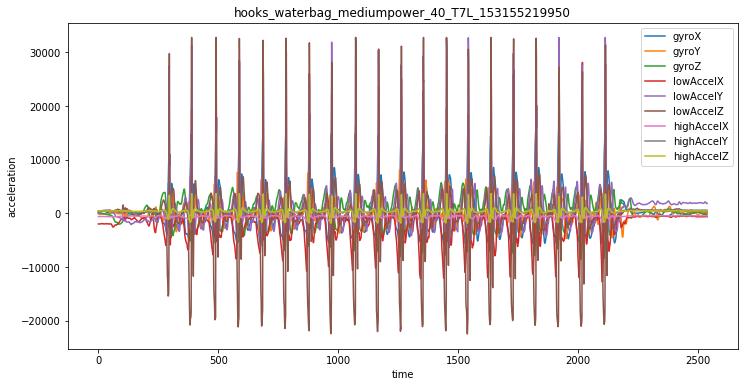

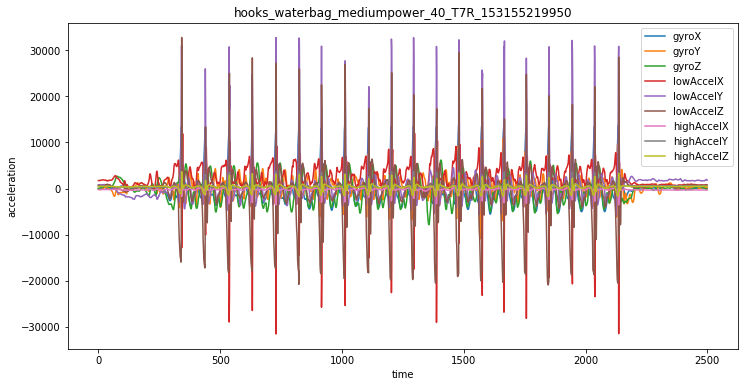

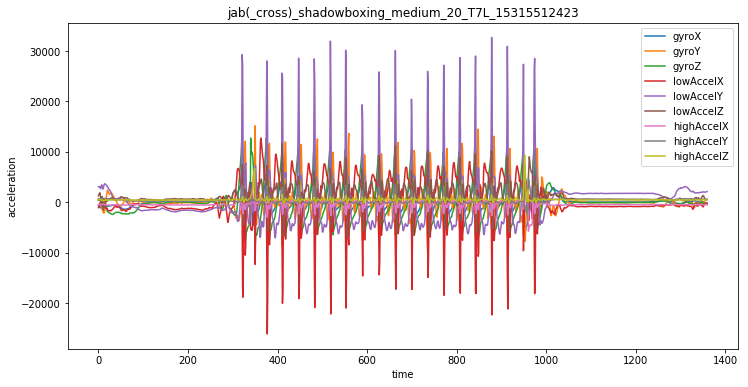

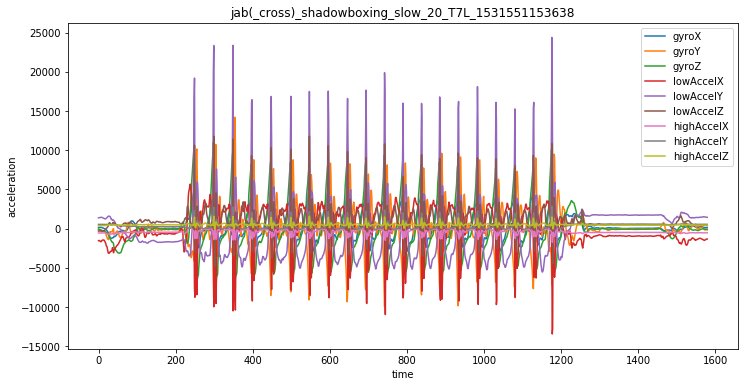

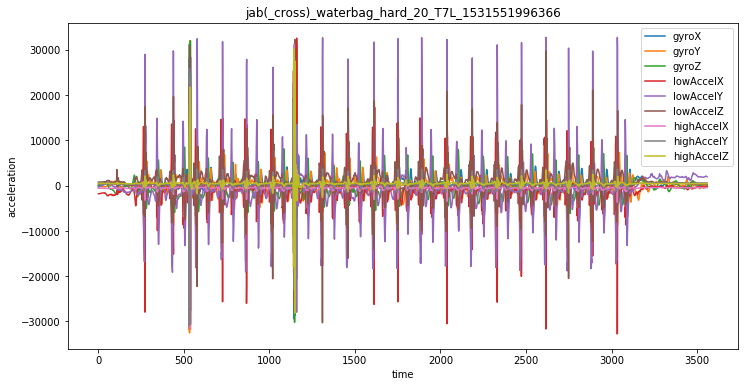

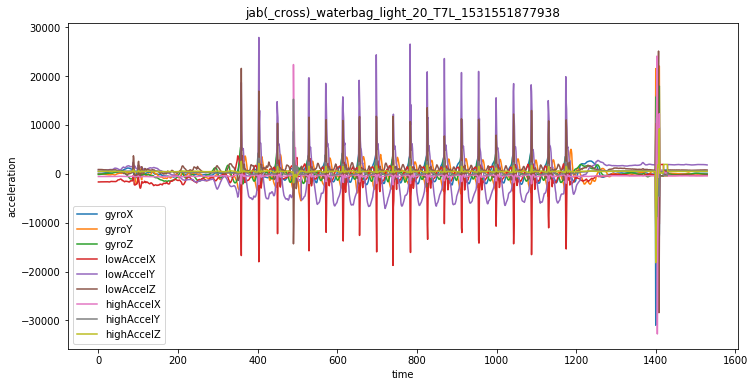

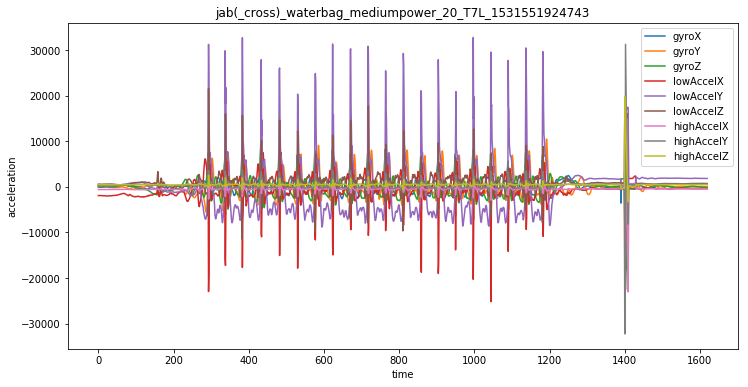

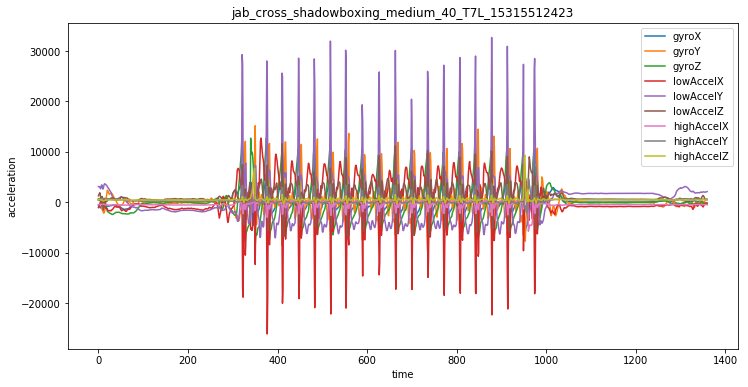

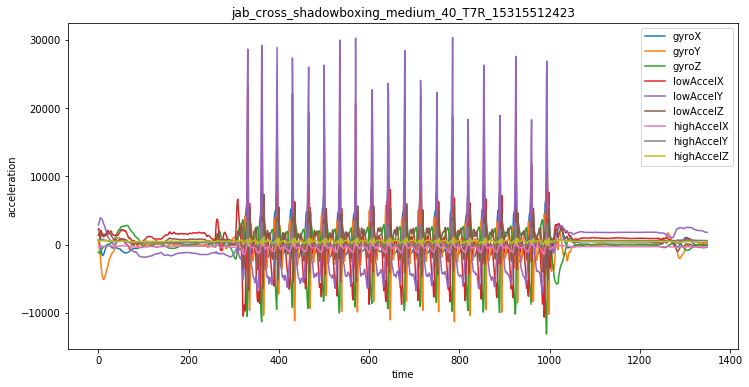

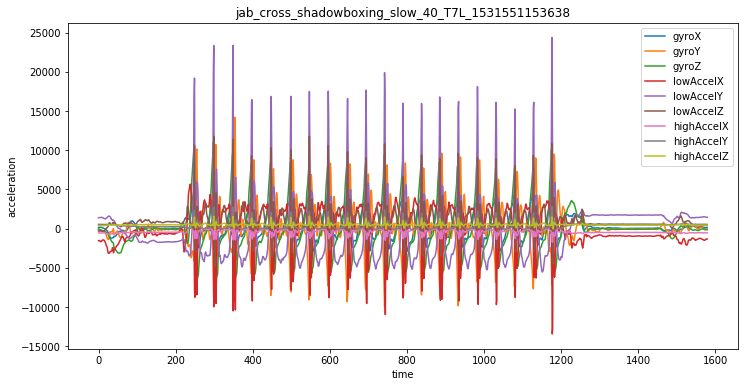

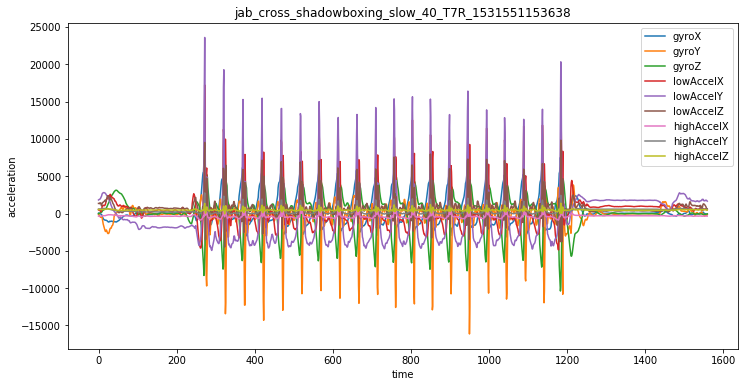

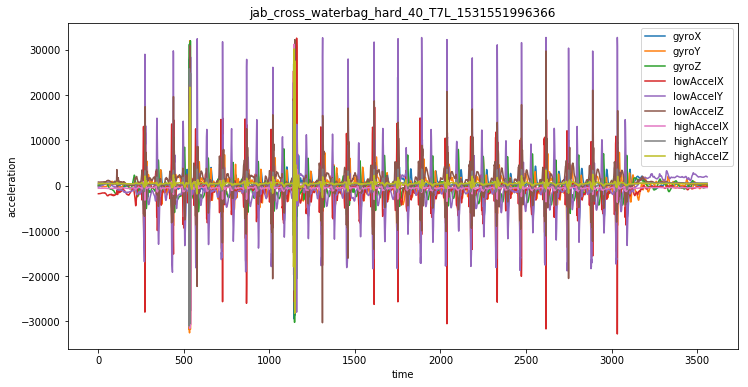

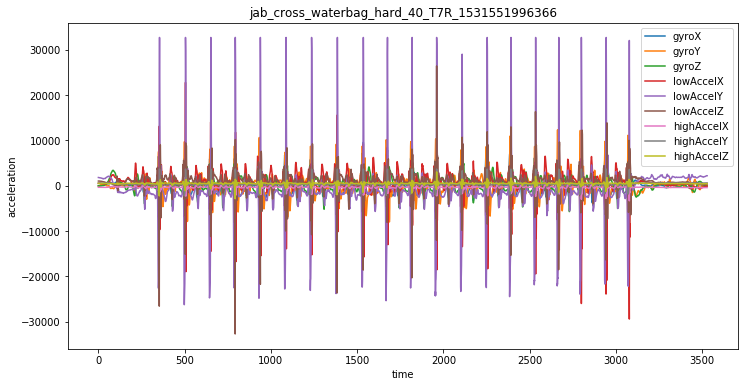

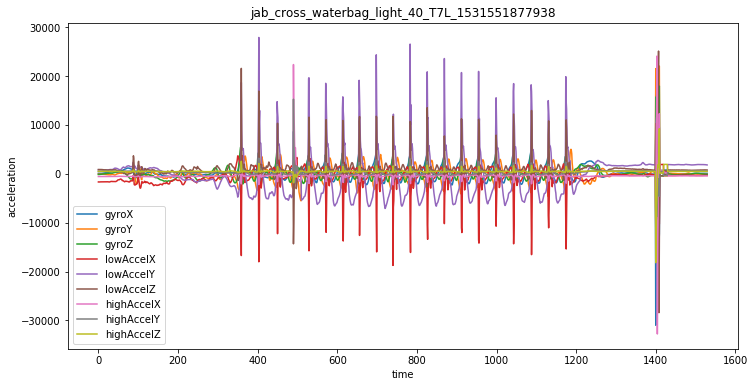

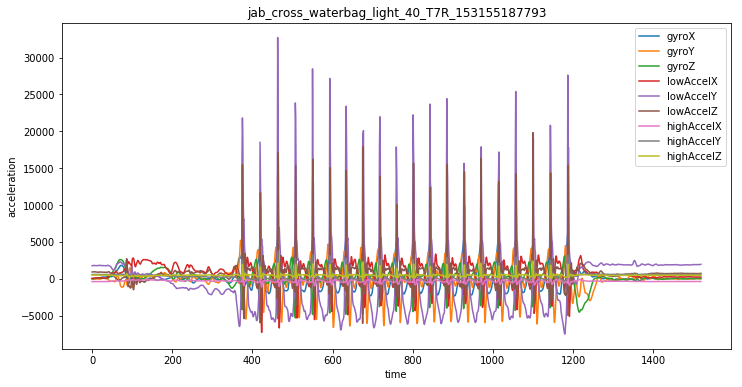

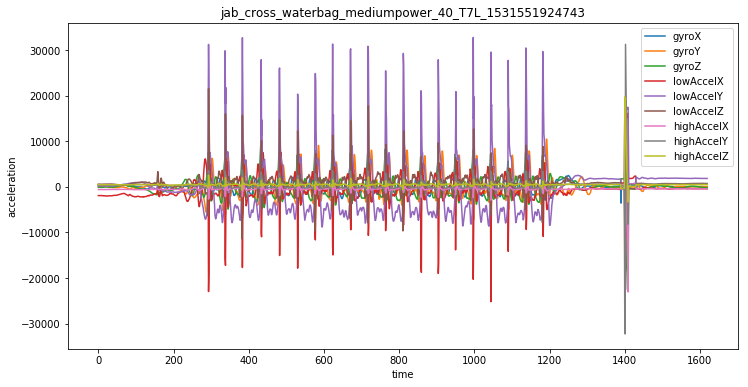

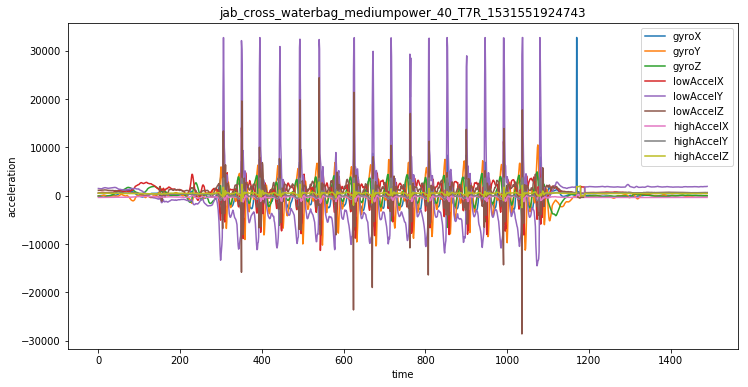

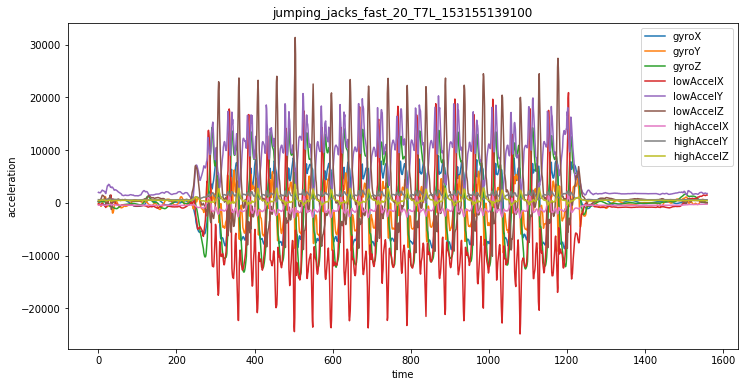

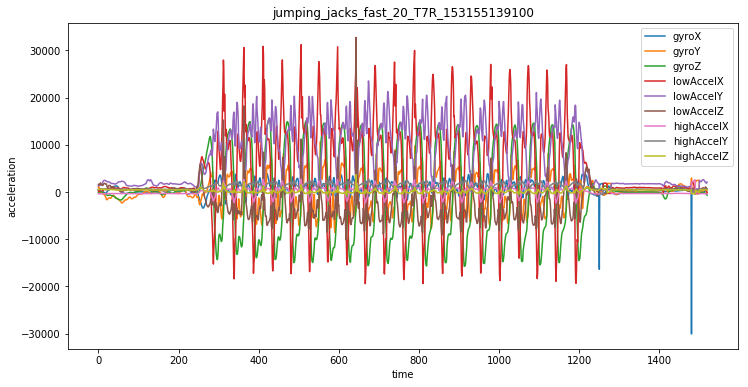

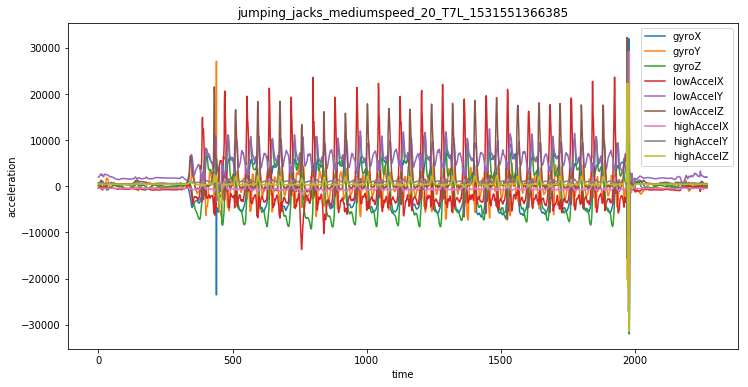

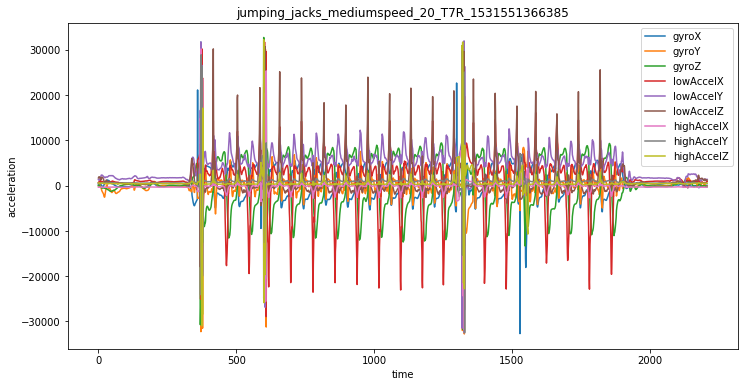

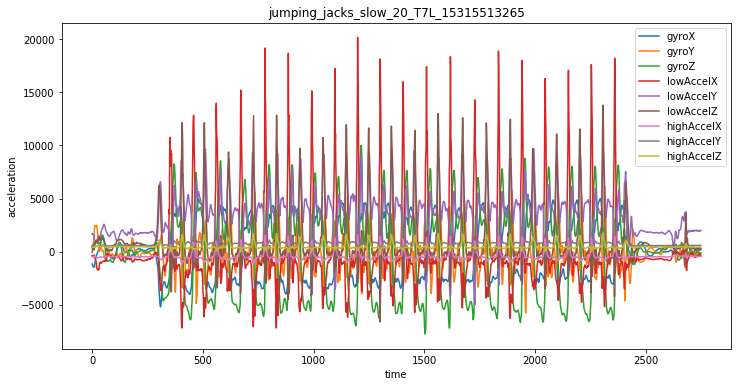

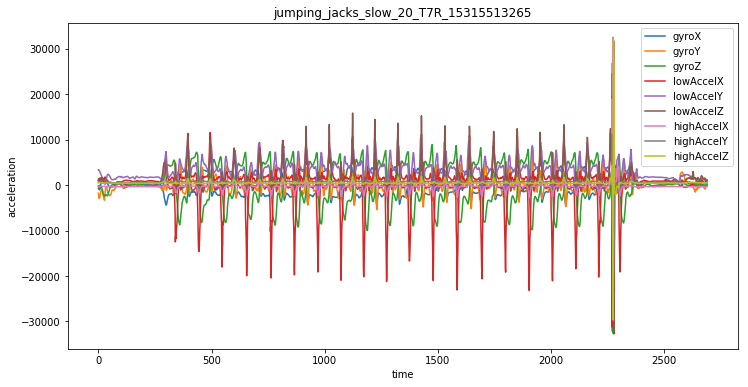

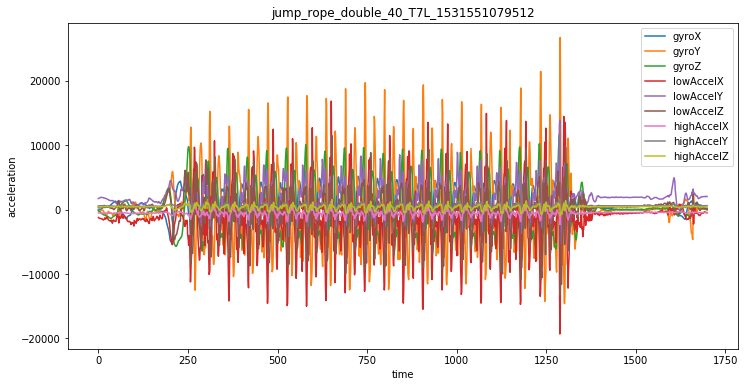

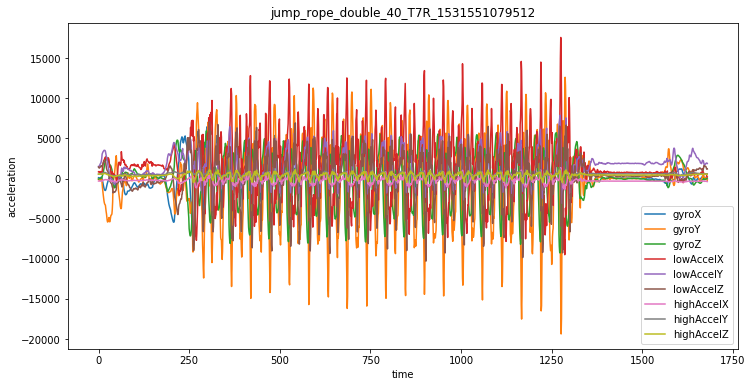

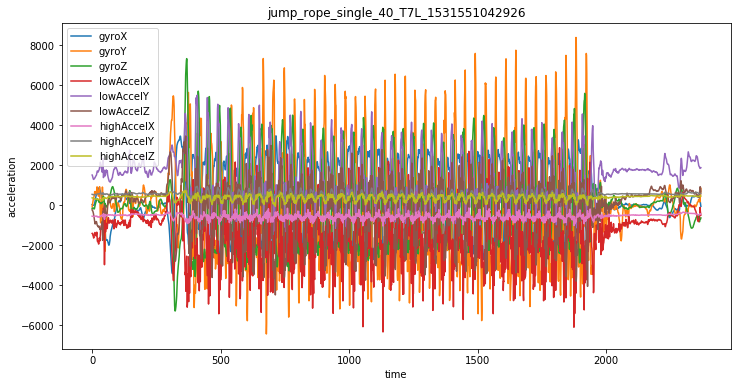

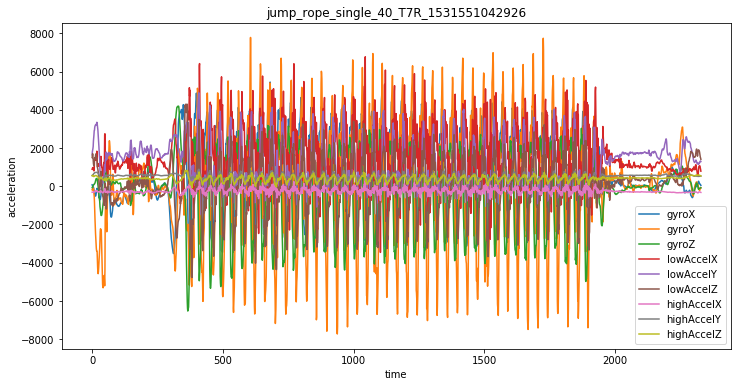

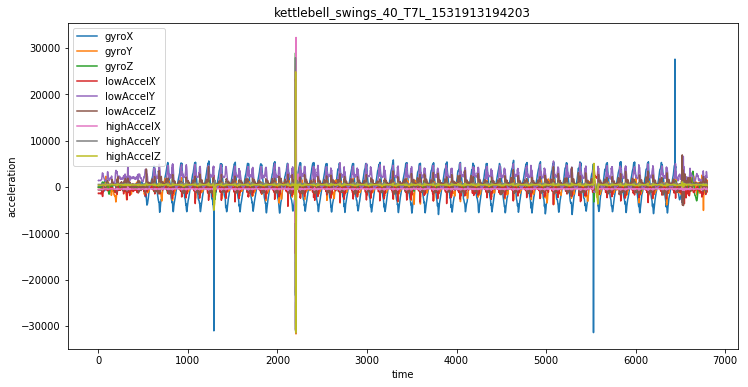

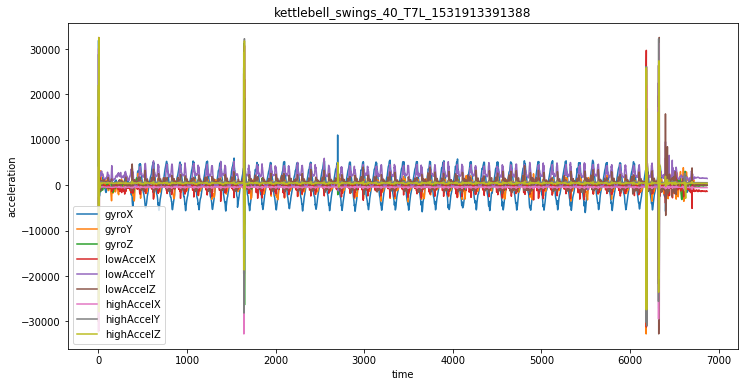

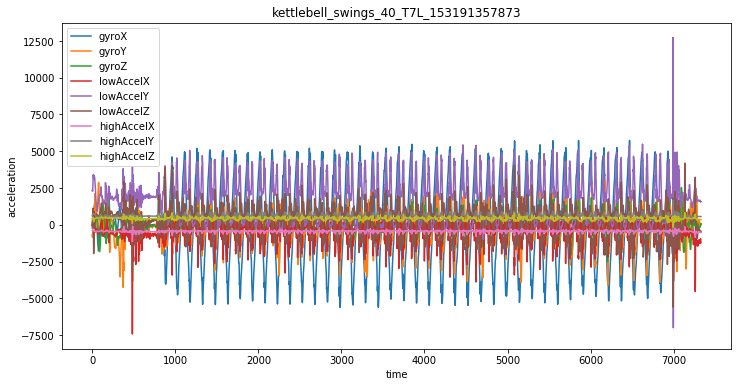

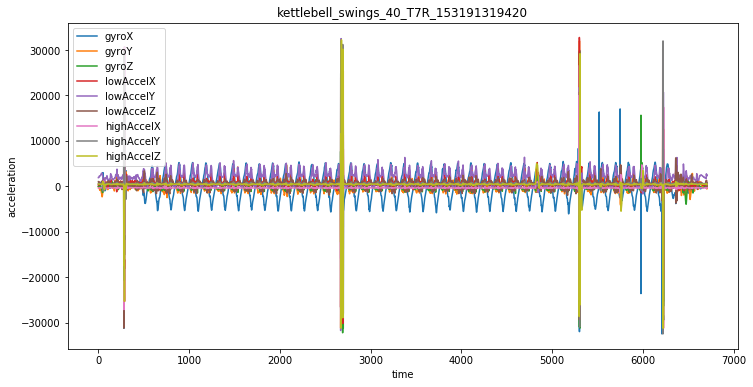

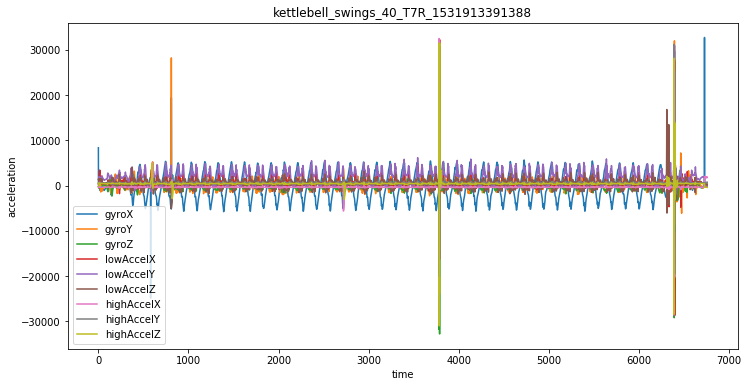

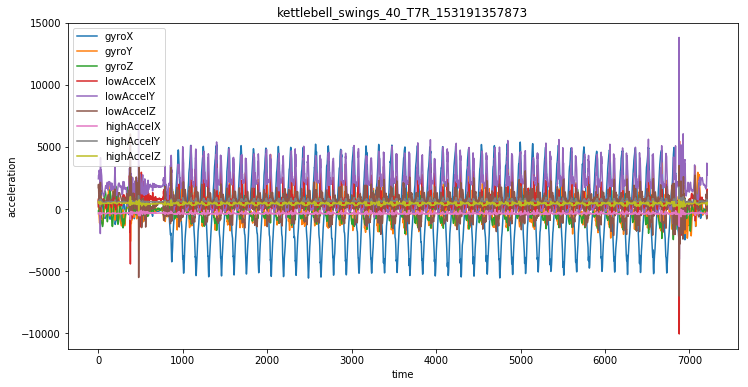

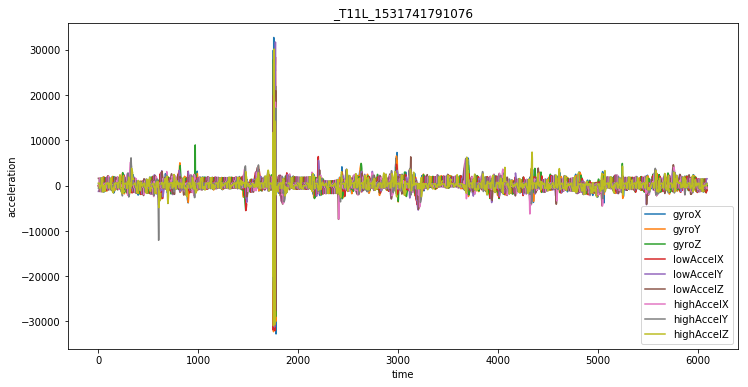

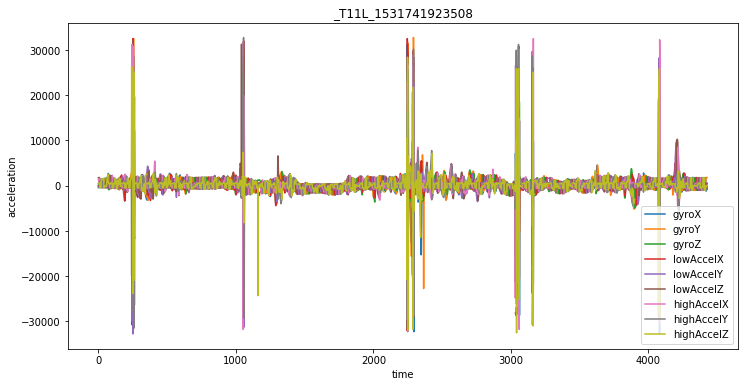

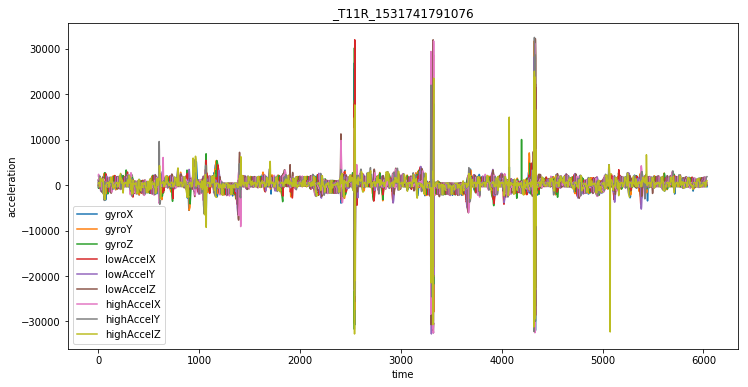

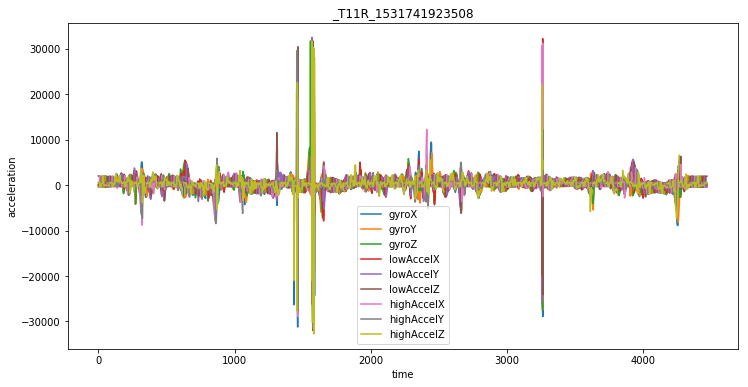

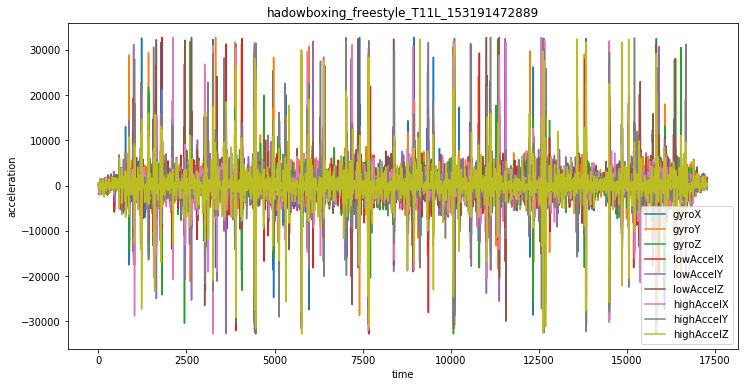

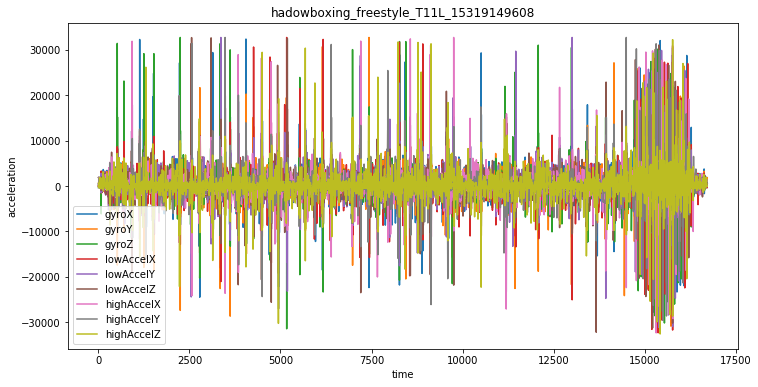

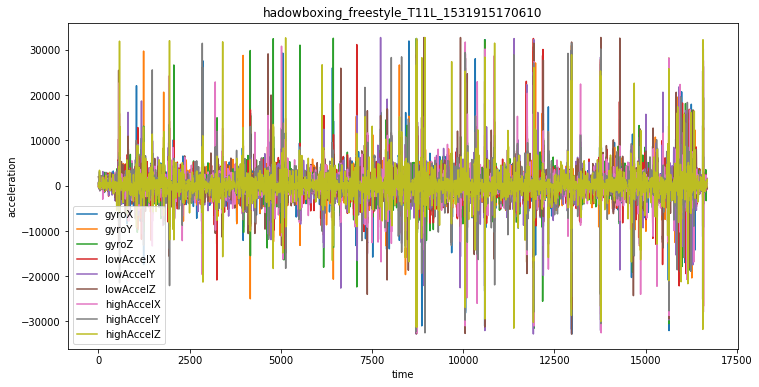

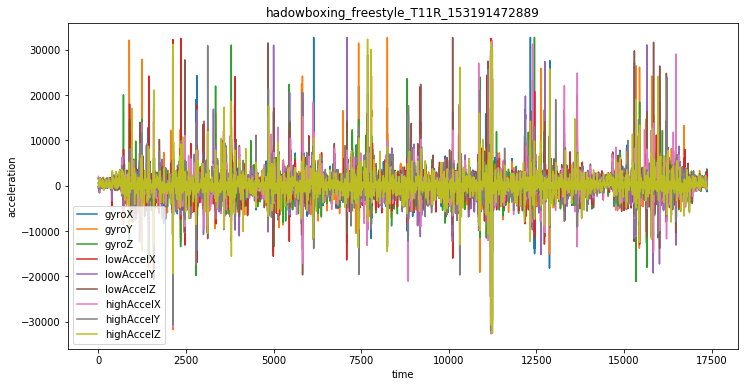

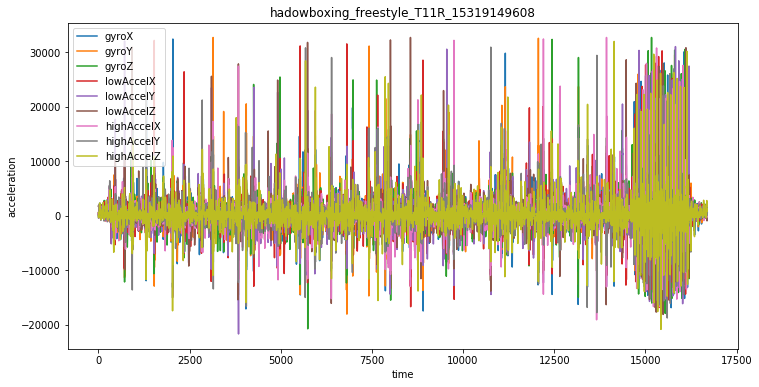

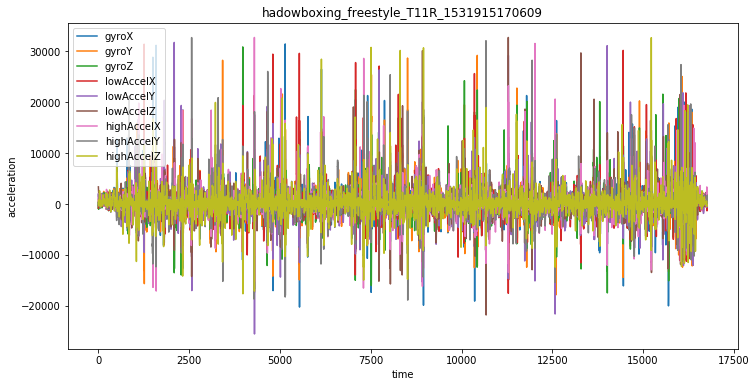

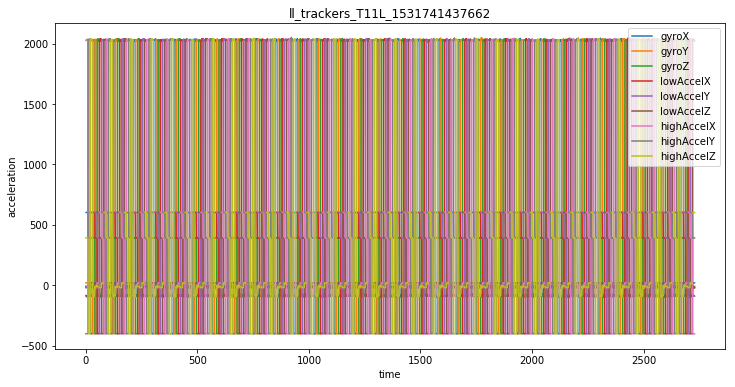

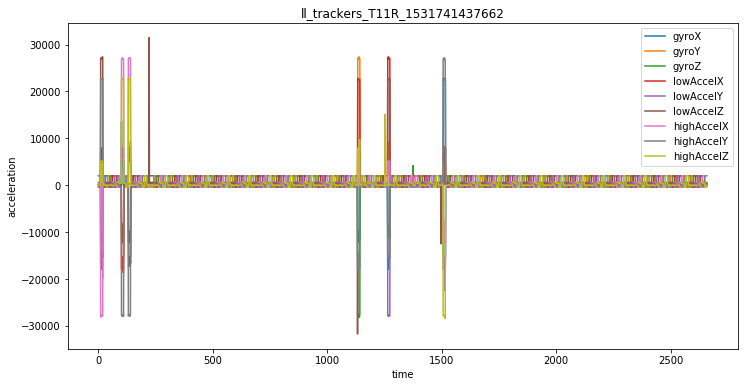

In [15]:
#Basic visualization
def pre_visualize(data,title):
    import matplotlib.pyplot as plt
    %matplotlib inline
    data.plot(figsize=(12, 6))
    plt.xlabel('time'), plt.ylabel('acceleration'),plt.title(title)
    plt.show()
for i in range(0,len(list_names)):
    pre_visualize(data1.loc[data1['exercise']==list_names[i],:],list_names[i])